# Project 6 EDA Notebook

### Author:  *Jackie Ganyo*
### Title:  *Custom Exploratory Data Analysis (EDA) Jupyter Notebook Project*
#### **Purpose:** 

This Jupyter Notebook project showcases the skills needed to perform an Exploratory Data Analysis (EDA) on Seaborn's health expenses dataset. The purpose of this project is to gain insights, discover patterns, and identify trends in the data through various statistical and visual exploration techniques. The analysis will help us answer the following questions:  

*"Would increased spending in health expenses show significant increases in life expectancy?"*
- [ ] *"If yes, is there a ceiling to that spending that maximizes gains in life expectancy?"*
- [ ] *"If no, is there evidence about what other factors influence gains in life expectancy?"*




In [1]:
#Import statements for all required libraries
import jupyter
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns
import scipy

#### Load the dataset into a pandas DataFrame -  Seaborn Health Expense set



In [2]:
#Load the healthexp dataset from Seaborn, define it as variable 'df'
df = sns.load_dataset('healthexp')

#Set the theme for the Seaborn plots to dark
sns.set_theme(style="dark")


#### Inspect first rows of the DataFrame


In [3]:
print(df.head())

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9


#### Initial Data Inspection

In [4]:
#Display the first 10 rows of the dataset
print(df.head(10))

#Check the shape of the data frame
print(df.shape)

#Check the data types of the columns
print(df.dtypes)

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9
5  1971         Canada       313.391             72.8
6  1971        Germany       298.251             70.8
7  1971  Great Britain       134.172             71.9
8  1971          Japan       163.854             72.9
9  1971            USA       357.988             71.2
(274, 4)
Year                 int64
Country             object
Spending_USD       float64
Life_Expectancy    float64
dtype: object


#### Initial Descriptive Statistics

In [5]:
#Run the describe function on the data frame
print(df.describe())

              Year  Spending_USD  Life_Expectancy
count   274.000000    274.000000       274.000000
mean   1996.992701   2789.338905        77.909489
std      14.180933   2194.939785         3.276263
min    1970.000000    123.993000        70.600000
25%    1985.250000   1038.357000        75.525000
50%    1998.000000   2295.578000        78.100000
75%    2009.000000   4055.610000        80.575000
max    2020.000000  11859.179000        84.700000


#### Initial Data Distribution for Numerical Columns

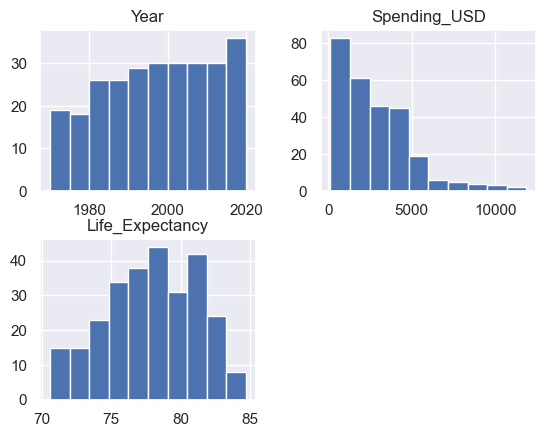

In [6]:
#Inspect histogram by calling the hist function on the data frame
df.hist()

#show the histogram
plt.show()

#### **Initial Data Distribution for Categorial Columns**

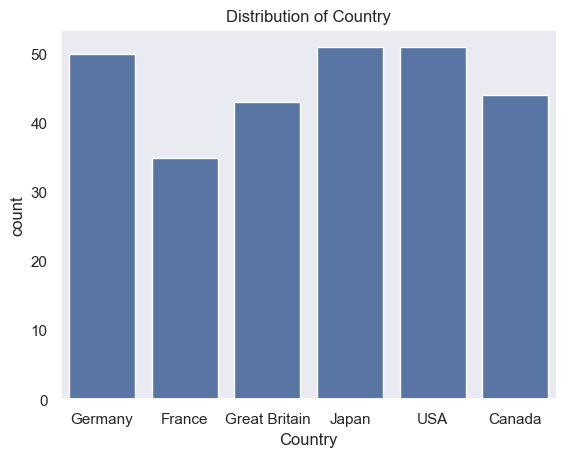

In [7]:
#Inspect value counts for categorical columns
df.value_counts()

#Inspect value counts for Country column
for col in df.select_dtypes(include=['object', 'category']).columns:
    #Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

#Show all plots
plt.show()    

#### **Initial Data Transformation & Feature Engineering**

In [8]:
#Rename at least one column
df.rename(columns={'Spending_USD':"Expense_USD"}, inplace=True)

#Add at least one column
df['Expense_per_Life_Expectancy'] = df['Expense_USD'] / df['Life_Expectancy']

#Display the first rows of the dataset to show changes made
print(df.head())

   Year        Country  Expense_USD  Life_Expectancy  \
0  1970        Germany      252.311             70.6   
1  1970         France      192.143             72.2   
2  1970  Great Britain      123.993             71.9   
3  1970          Japan      150.437             72.0   
4  1970            USA      326.961             70.9   

   Expense_per_Life_Expectancy  
0                     3.573810  
1                     2.661260  
2                     1.724520  
3                     2.089403  
4                     4.611580  


##### **Impressions based on histograms and initial stats:** 
1. Six countries are representing in the healthexp dataset:  Germany, Japan, USA, Canada, Great Britain, and France.

1. Three countries are represented with 50 entries-spanning years from 1970 through 2020:  Germany, Japan, and USA.  

1. Spending_USD is left skewed meaning the majority of the data points fall at the lower expense amounts with a outliers very high above the rest.  Most of the datapoints appear below $5,000.

1. The histogram for Life_Expectancy shows a normal distribution with peaks at or slightly above the average (77.9).

#### **Initial Visualizations**
Create a variety of chart types using seaborn and matplotlib to showcare different aspects of health expenses data. Include the goal for each chart-what you want to learn/explore, the type of chart your choose, display the chart, and tell your data story.  
Intuitively, one would think spending more on health would result in higher life expectancies. The goal for this initial set of visualizations is to determine if there is a relationship between amount of money spent and life expectancy. Secondly, does increased health sector spending equate to higher life expectancies. 

##### **Goal:** Determine if there is a correlation between health expense and life expectancy. 

##### **Chart type:** Scatterplot of money spent and life expectancy.


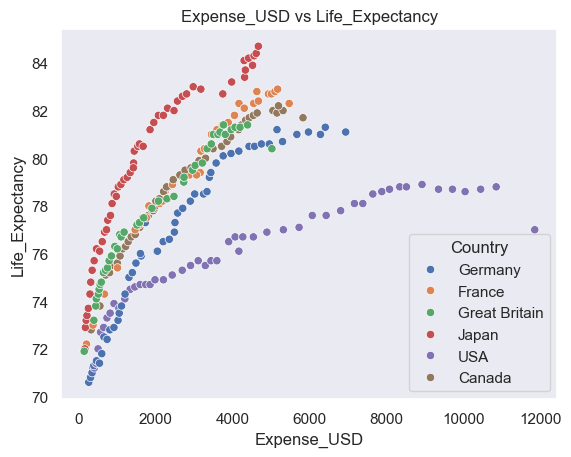

In [9]:
sns.scatterplot(
    data=df,
    
    x="Expense_USD", 
    y="Life_Expectancy",
    hue="Country"
)
plt.title('Expense_USD vs Life_Expectancy')
plt.show()


#### **Impressions based upon Expense and Life Expectancy Scatterplot:** 
1.  A positive correlation is seen between expense amount and life expectancy for all countries.  However, this scatterplot shows that after $4,000 is expended very small gains in life expectency are shown especially for the USA.

1. The USA's data shows large gains in life expectancy through $2,000 spending mark, then gains in life expectancy significantly decrease suggesting the health expenditures are not the only factor influencing life expectancy.  

1. The USA data also make on wonder why the additional expenditures have not produced results similar to the other 5 countries in the 2,000 to 4,000 USD expense range.

##### **Goal:** Determine what each country's life expectancy data looks like with average (mean) and quartile markings included. 
##### **Chart Types:**  
1. Violin plot that also contains marks for the average life expectancy and the upper and lower quartiles visualized (by country). 
2. Swarm plot to visualize any clusters of data within each Country's life expectancy. 

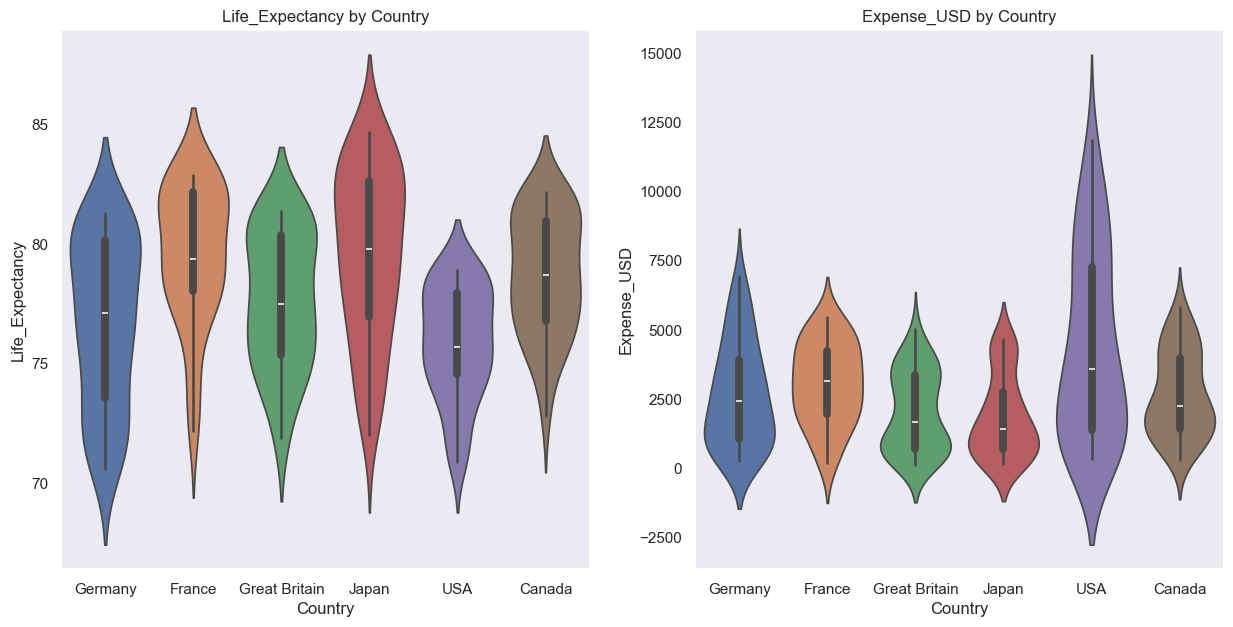

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

In [10]:
#Violin plot to show low, high, average and upper and lower quartile values by country 
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

plt.figure(figsize=(7,7))

sns.violinplot(
    y="Life_Expectancy",
    x="Country",
    hue="Country",
    data=df,
    ax=axes[0]
    )

axes[0].set_title('Life_Expectancy by Country')

plt.figure(figsize=(7,7))
sns.violinplot(
    y='Expense_USD',
    x='Country',
    hue='Country',
    data=df, 
    ax=axes[1]
)
axes[1].set_title('Expense_USD by Country')
plt.show()

Country
Japan            84.7
France           82.9
Canada           82.2
Great Britain    81.4
Germany          81.3
USA              78.9
Name: Life_Expectancy, dtype: float64
Difference between highest and lowest Life Expectancy: 6 years.


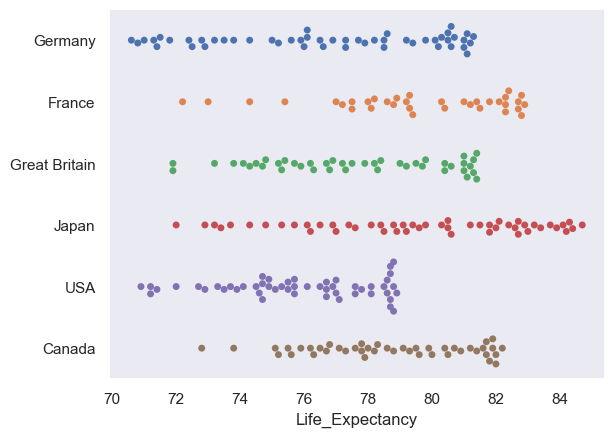

In [11]:
#Swarm plot:  Input a secondary visualization to see if it clarifies some of the information from violin plot.  Identify clusters of data. 

ax = sns.swarmplot(data=df, x="Life_Expectancy", y="Country", hue="Country")
ax.set(ylabel="")

#Identify high and low values for Life Expectancy by country. Print in descending order. 
print(df.groupby('Country')['Life_Expectancy'].max().sort_values(ascending=False))

#Calculate difference between highest and lowest values. Print result.
difference = round(df.groupby('Country')['Life_Expectancy'].max().sort_values(ascending=False).max() - df.groupby('Country')['Life_Expectancy'].max().sort_values(ascending=False).min())
print("Difference between highest and lowest Life Expectancy:", difference, "years.")

#### **Impressions based upon Violin plots and Swarm plot**
1. USA has the lowest average life expectancy and the highest average expense_USD. If more spending meant more gains in life expectancy, we should see the USA violin plots (left and right) have very similar appearances.  We do not see that here.

1. Japan has the highest average life expectancy and the lowest average expense_USD. A similar analysis can be made for Japan's violin plots-if lower spending meant lower life expectancy, Japan's second violin should show a similar shaped violin.  This is not seen. 
1. The USA and Japan are polar opposites when comparing the two violin plots.  Emphasizing the earlier statement that another factor outside of health spending is influencing life expectancy. There is no data within this set to create suitable alternative hypotheses though life experience would lead this analyst to begin with analyzing cultural differences (foods, lifestyle, exercise, etc.).
1. The swarm plot shows areas where countries have hit plateaus in life expectancy and where they are currently in striving to increase life expectancy.  Current plateaus:  Japan 84.7, France 82.9, Canada 82.2, Great Britain 81.4, Germany 81.3 years and USA 78.9 years.  The difference between highest and lowest is approximately 5.79999 years rounded.to 6 years. 

##### **Goal:**  Would dropping the USA data dramatically shift the results of this dataset?  
##### **Chart Type:** Violin plots 

              Year  Expense_USD  Life_Expectancy  Expense_per_Life_Expectancy
count   223.000000   223.000000       223.000000                   223.000000
mean   1997.448430  2423.595350        78.382063                    30.246530
std      14.014336  1618.626303         3.281046                    19.539293
min    1970.000000   123.993000        70.600000                     1.724520
25%    1986.000000  1007.929000        76.100000                    13.226763
50%    1998.000000  2169.451000        78.600000                    26.900359
75%    2009.000000  3735.054500        81.050000                    45.948661
max    2020.000000  6938.983000        84.700000                    85.560826


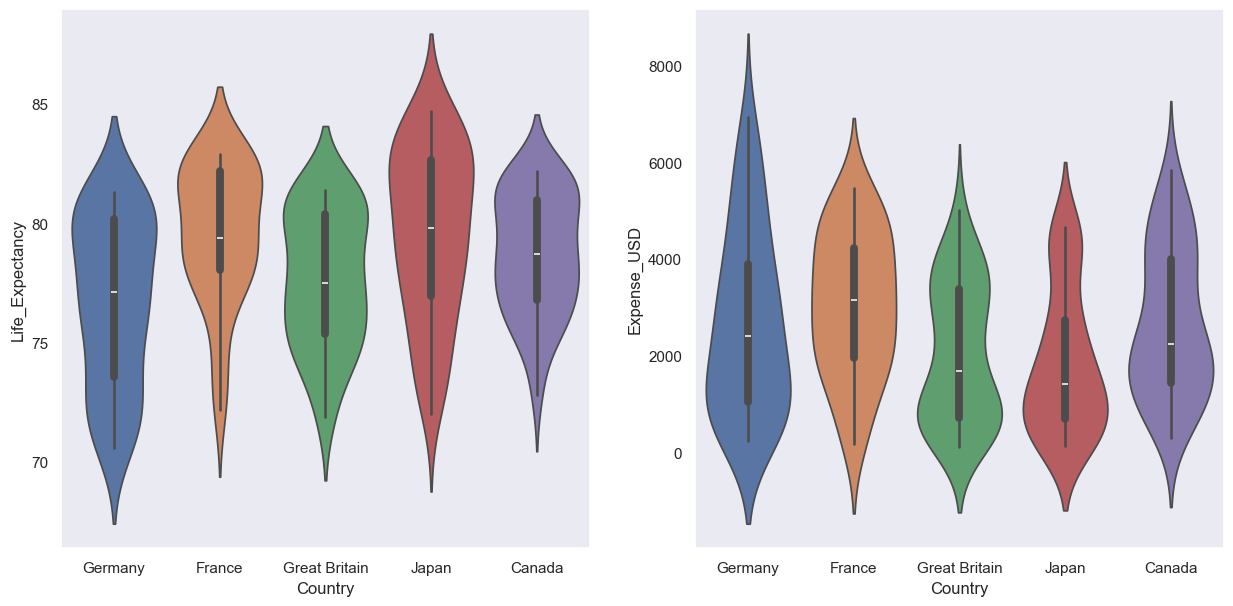

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

In [12]:
#Remove USA data from set and re-run the describe,  violin plots, and swarm plot to see if there are any changes in the data.
df = df[df.Country != 'USA']

df.describe()
print(df.describe())

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

plt.figure(figsize=(7,7))
sns.violinplot(
    y="Life_Expectancy",
    x="Country",
    hue="Country",
    data=df,
    ax=axes[0]
    )

plt.figure(figsize=(7,7))
sns.violinplot(
    y='Expense_USD',
    x='Country',
    hue='Country',
    data=df, 
    ax=axes[1]
)
plt.show()

#### **Impressions based upon final visualization**
1.  The violin plots appear much different lending one to think there will be significant changes in the numbers.  However, that is not the case.  The average life expectancy only increased from 77.91 to 78.38 or roughly .57 year increase the same change is seen in the upper and lower quartile numbers.  The minimum and maximum life expectancies remained the same. 

1.  Removing the USA data set did not significantly impact the overall statistical analysis of the set.  


#### **Final impresions and further questions**
1.  The Seaborn healthexp dataset shows that every country continues to show life expectancy gains with increased health expenditures through 2020 data.  However, there appears to be a ceiling on meaningful gains after approximately $4,000 in spending.

2.  The USA data shows a huge decline in life expectancy gains as their spending reaches well above the aforementioned ceiling of $4,000. 

3.  Japan has by far the highest life expectancy to expense ratio.

4.  The other countries fall on a continuum between Japan and the USA.  

5. Additional questions:

    a. *If spending over the $4,000 ceiling is not showing significant increases in life expectancy, where can the process be improved to inform higher gains and making expenditures more meaningful?*
    
    b. *What are the Japanese people doing differently that might help the other 5 countries show greater gains in life expectancies?*
